# Libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import seaborn as sns
sns.set()


# Import data 

In [4]:
df = pd.read_csv('purchase data.csv')

# Data Exploration

In [5]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [8]:
#check the null values
df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Data segmentation

## Import Segmentation Model 

In [13]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [14]:
pca = pickle.load(open('pca.pickle','rb'))

In [15]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [18]:
features = df[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_segm_std = scaler.transform(features)

## PCA

In [19]:
df_segm_pca = pca.transform(df_segm_std)

## K-Means PCA

In [20]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_segm_pca)

In [21]:
df_purchase_predictors = df.copy()

In [22]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

# Descriptive Analysis by Segments  

## Data Analysis by customer

In [23]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [26]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns ={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [29]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns ={'Incidence':'N_Purchases'})

#join temp1 and temp2
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [34]:
temp3['Average_N_Purchased'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchased
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [35]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [36]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchased,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


## Segment Proportions

In [41]:
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases':'Segment Proportion'})
segm_prop.head()

,Segment Proportion
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


([<matplotlib.patches.Wedge at 0x17c3e9b8ca0>,
 [Text(0.41135515458462724, 1.0201896572680285, 'Standard'),
  Text(-1.09737375346957, 0.07596607924664538, 'Career-Focused'),
  Text(-0.32013982213534214, -1.052383244965042, 'Fewer-Oppertunity'),
  Text(0.9019473089387411, -0.6296753543677592, 'Well-off')],
 [Text(0.2243755388643421, 0.556467085782561, '37.8%'),
  Text(-0.5985675018924926, 0.04143604322544293, '22.2%'),
  Text(-0.17462172116473204, -0.5740272245263865, '20.6%'),
  Text(0.49197125942113146, -0.3434592842005959, '19.4%')])

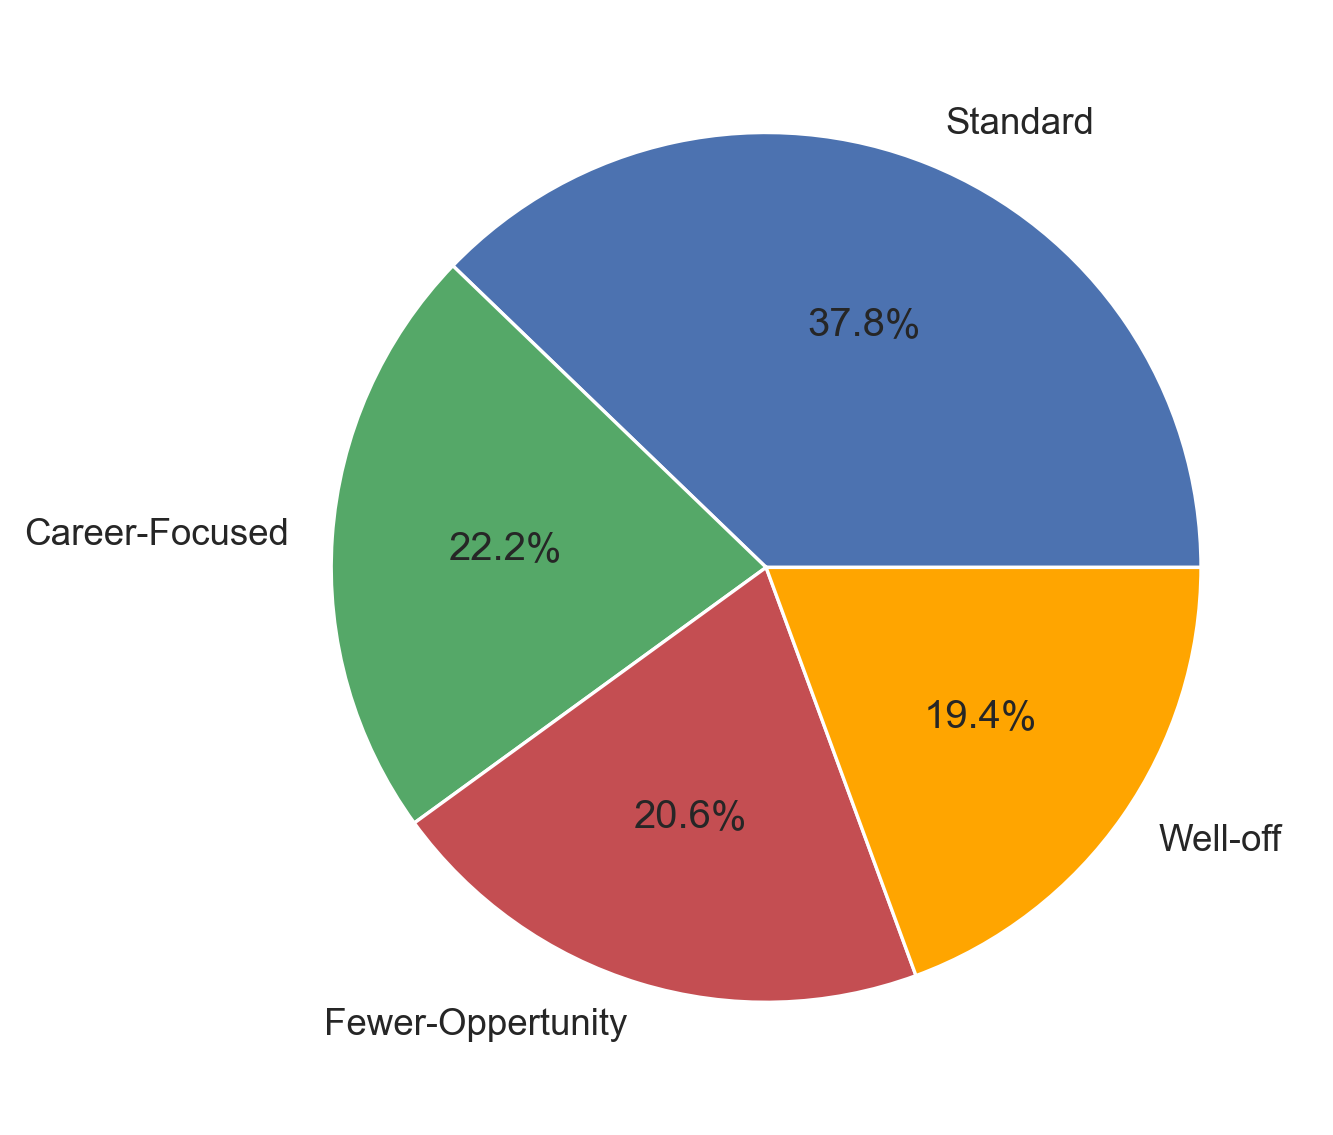

In [44]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportion'],#
       labels = ['Standard','Career-Focused','Fewer-Oppertunity','Well-off'],
        autopct = '%1.1f%%',
        colors =('b','g','r','orange'))

## Purchase occasion and Purcahse Incidence

In [45]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()

In [46]:
segments_mean

,N_Visits,N_Purchases,Average_N_Purchased
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [47]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

In [48]:
segments_std

,N_Visits,N_Purchases,Average_N_Purchased
Segment,,,
0,16.397308,13.803513,0.120305
1,44.730792,53.551552,0.199518
2,19.039605,16.774464,0.126603
3,20.794796,26.003011,0.172293


Text(0.5, 1.0, 'Average numbers of store visits by segments')

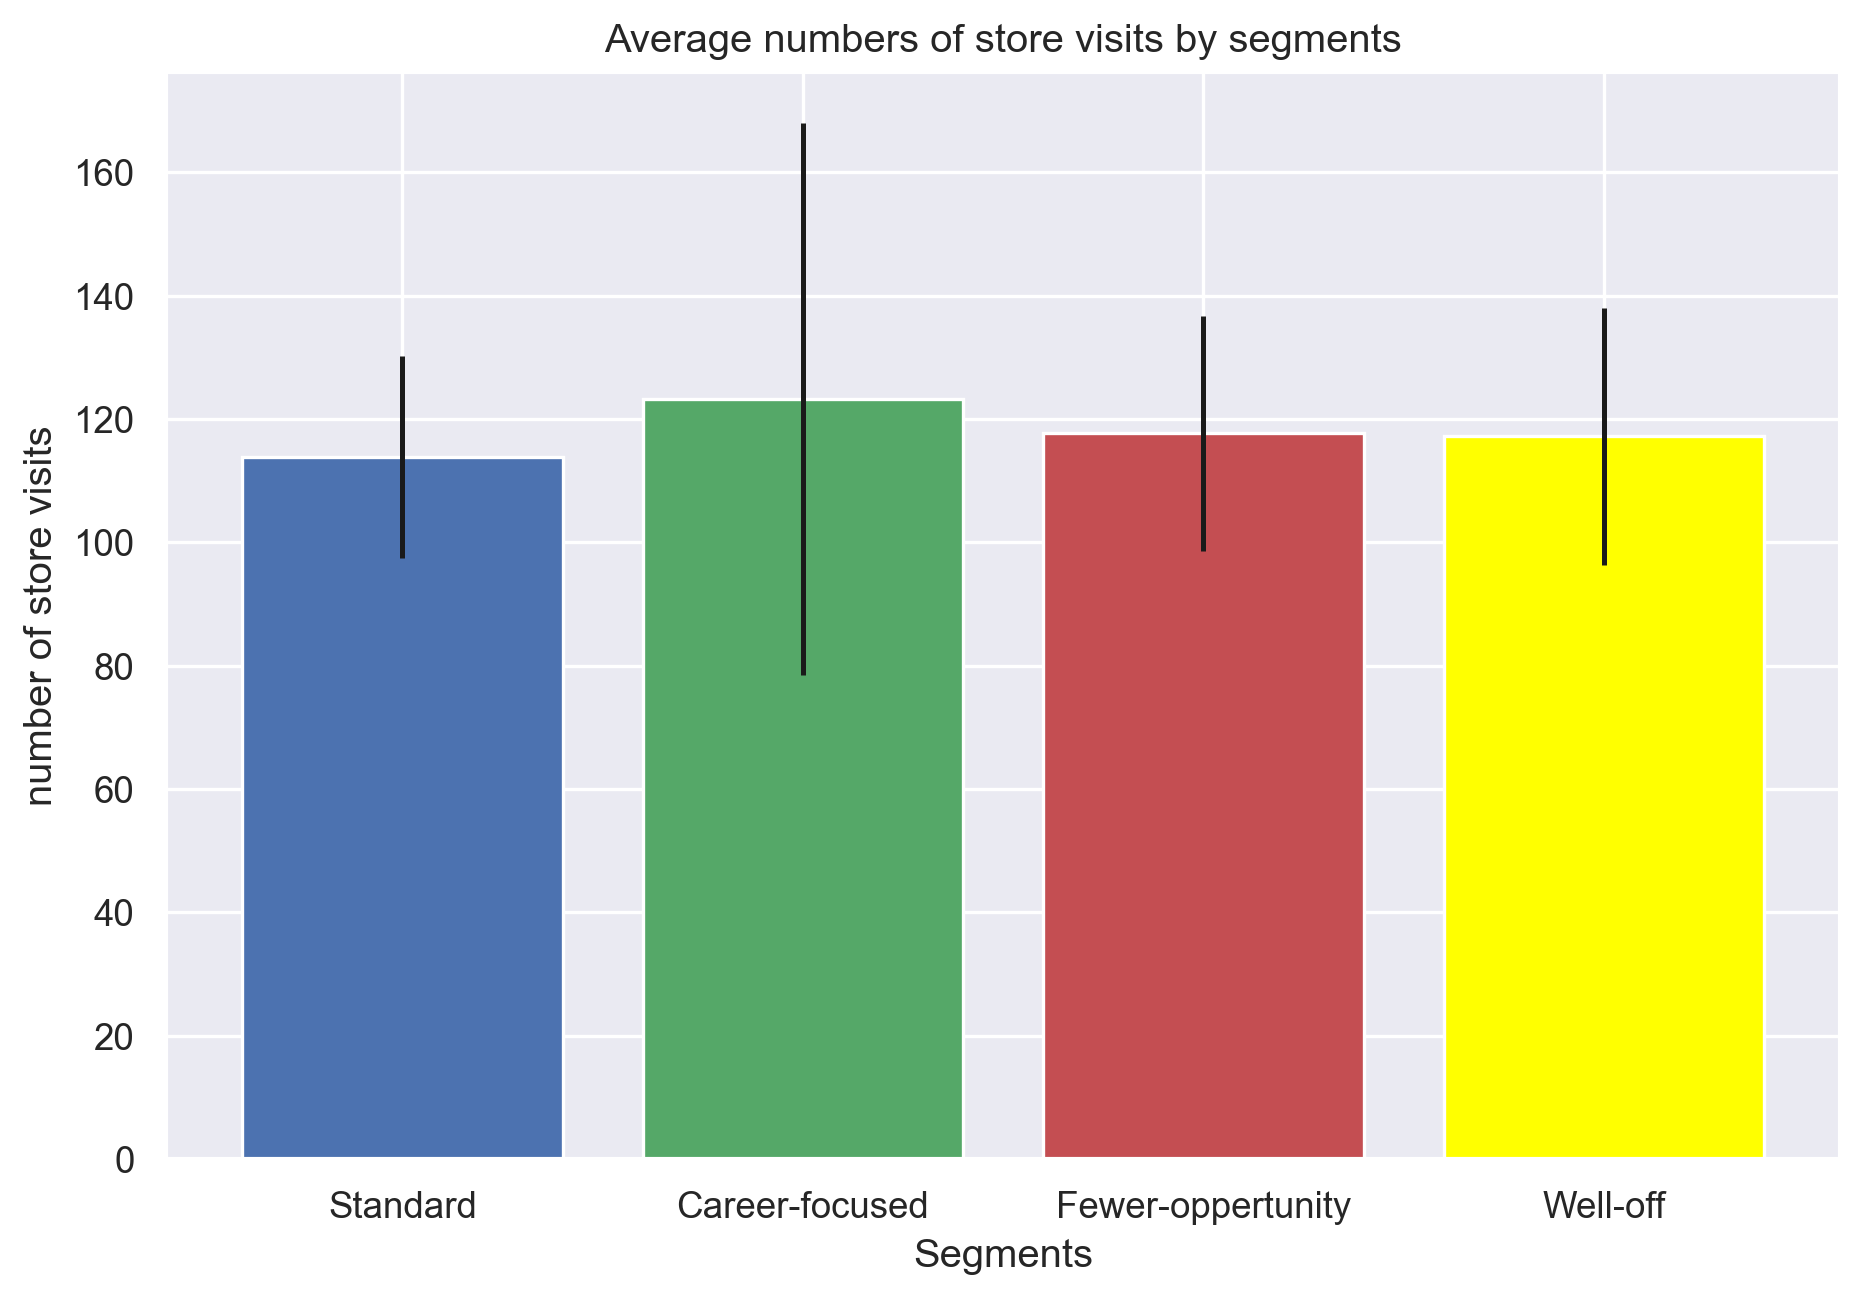

In [49]:
plt.figure(figsize =(9,6))
plt.bar(x=(0,1,2,3),
       tick_label =('Standard','Career-focused','Fewer-oppertunity','Well-off'),
       height = segments_mean['N_Visits'],
       yerr = segments_std['N_Visits'],
        color =('b','g','r','yellow')
       )
plt.xlabel('Segments')
plt.ylabel('number of store visits')
plt.title('Average numbers of store visits by segments')

Text(0.5, 1.0, 'Numbers of Purcahse by Segment')

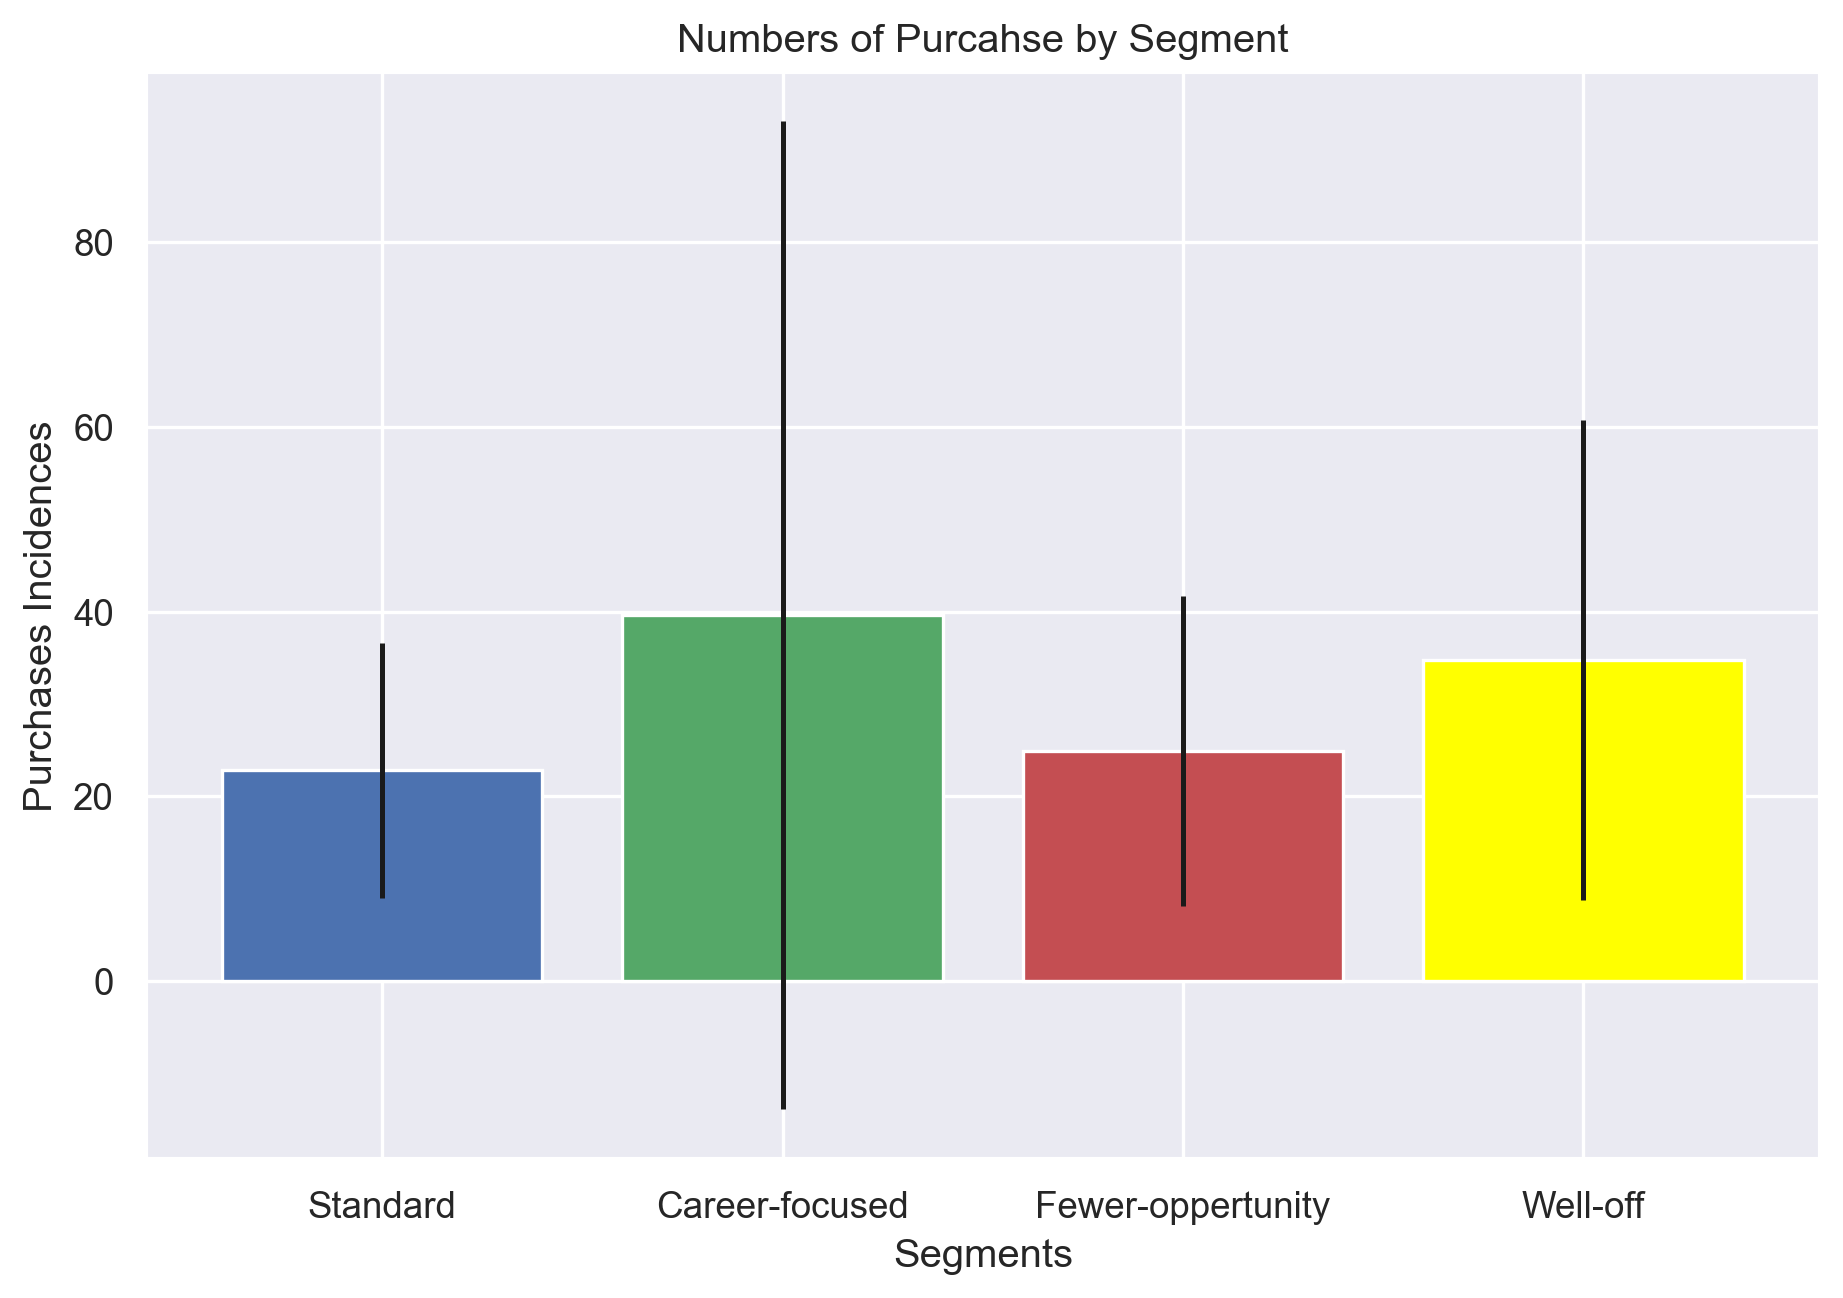

In [50]:
plt.figure(figsize =(9,6))
plt.bar(x=(0,1,2,3),
       tick_label =('Standard','Career-focused','Fewer-oppertunity','Well-off'),
       height = segments_mean['N_Purchases'],
       yerr = segments_std['N_Purchases'],
        color =('b','g','r','yellow')
       )
plt.xlabel('Segments')
plt.ylabel('Purchases Incidences')
plt.title('Numbers of Purcahse by Segment')

# Brand Choice

In [51]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [53]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],prefix = 'Brand',prefix_sep= '-')

In [54]:
brand_dummies['Segment'],brand_dummies['ID']= df_purchase_incidence['Segment'],df_purchase_incidence['ID']

In [55]:
brand_dummies

,Brand-1,Brand-2,Brand-3,Brand-4,Brand-5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [56]:
temp = brand_dummies.groupby(['ID'],as_index= True).mean() 

In [57]:
mean_brand_choice = temp.groupby(['Segment'],as_index = True).mean()

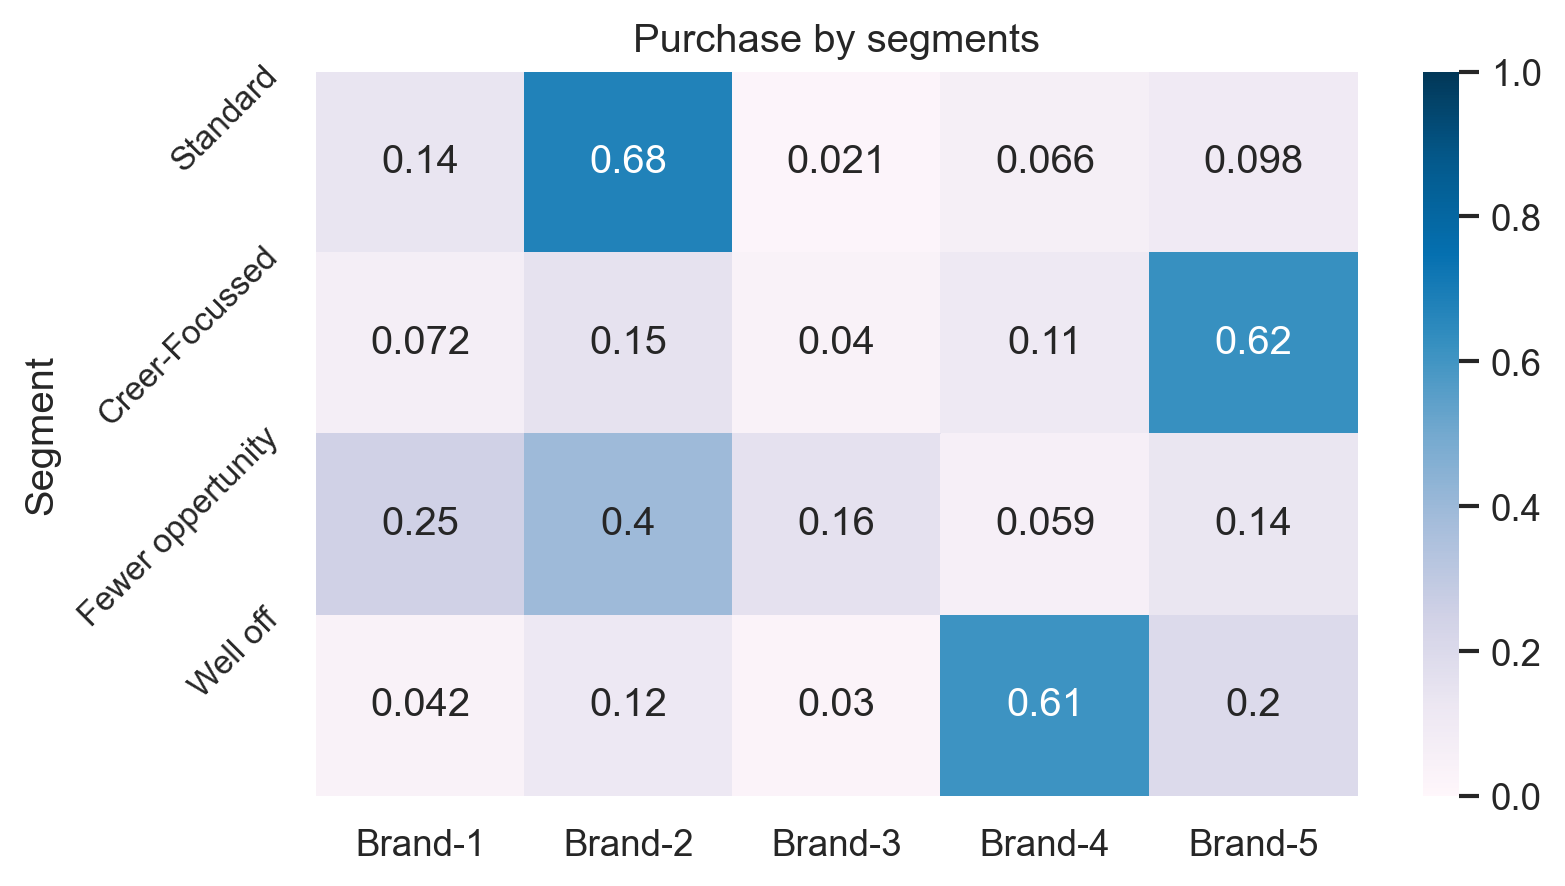

In [61]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap ='PuBu',
           annot = True)
plt.yticks([0,1,2,3],['Standard','Creer-Focussed','Fewer oppertunity' ,'Well off'],rotation = 45,fontsize =10)
plt.title('Purchase by segments')
plt.show();

# Revenue

In [62]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# we multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [63]:
# Compute revenue for brand 2. We use the same formula, but here we filter our data to contain only purchases of brand 2.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
# Compute revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

In [65]:
# Compute revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

In [66]:
# Compute revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

In [67]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
1,1,736.09,1791.78,664.75,2363.84,19456.74,25013.20
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,699.47,1298.23,725.54,14009.29,5509.69,22242.22


In [69]:
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
Segment,,,,,,
Standard,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
Career-Focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20
Fewer-Opportunities,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
Well-Off,699.47,1298.23,725.54,14009.29,5509.69,22242.22
